Máximizar: 

$z=4x_1+x_2$

Sujeta a:

$3x_1 + x_2 = 3$

$4x_1 + 3x_2 \geq 6$

$x_1 + 2x_2 \leq 4$

In [20]:
from scipy.optimize import linprog 

#### La libreria anterior "from scipy.optimize import linprog" funciona para resolver problemas de programación lineal de tipo:

### min $c^Tx$

### Sujeto a:

### $A_{ub}x \leq b_{ub}$

### $A_{eq}x = b_{eq}$

### $l \leq x \leq u$

#### Donde x es un vector de valores a minimizar; $c, b_{ub}, b_{eq}, l$ y $u$ son vectores; y $A_{ub}$ y $A_{eq}$ son matrices

#### Dado que nuestro problema se enfoca en maximizar, utilizamos los valores negativos de los coeficientes de la función objetivo z, como los que usamos comunmente en el metodo simplex

#### Ahora, como  la libreria trabaja con matrices, necesitamos establecer nuestro programa lineal en este última forma, comenzamos declarando una matriz que obtenga los valores objetivos y que según la sintaxis de la libreria, debe ser nuestra matriz $c$

In [42]:
c=[-4,-1]

#### Ahora debemos de hacer una matriz $A_{eq}$ para la igualdad $3x_1 + x_2 = 3$, no podemos hacer simplemente una declaración como en $c$, es decir, no basta con colocar $A_{eq}=[3,1]$; debido a que el problema contiene tres restricciones, la matriz $A_{eq}$ debe ser escrita de tal manera que las contenga, no importa que escribamos posteriormente la matriz $A_{ub}$ de desigualdades, la matriz de igualdades debe ser escrita de la siguiente manera:

In [77]:
A=[[3,1],[0,0],[0,0]]

#### Donde cada "$[a,b]$" es una columna de la matriz A construida, más adelante explicaremos porque no la declaramos como $A_{eq}$.

#### Como solo existe una igualdad y debido a que la matriz debe contener tres restricciones, simplemente colocamos columnas con entradas cero, para no alterar el resultado de la optimización.

#### Ahora escribimos una matriz $A_{ub}$, agregando de igual manera una columna extra de ceros para tener tres resricciones correspondientes al programa lineal y la interpretación que dan las librerias al mismo:

In [75]:
B= [[0,0],[-4,-3],[1,2]]

#### Los valores "$[-4,-3]$" son los coeficientes negativos de $4x_1 + 3x_2 \geq 6$ son tomados de esta forma debido a que la libreria toma restricciones de la forma $A_{ub}x \leq b_{ub}$, es decir, menor o igual (\leq), por lo que multiplicamos por $-1$ para obtener esta desigualdad. 

#### Ahora solo falta construir las matrices $b$ puesto que tenemos dos matrices, $A_{eq}(A)$ y $A_{ub}(B)$, necesitamos dos matrices $b_1$ y $b_2$ con los valores corespondientes de las restriciones en $A_{eq}$ y $A_{ub}$

In [65]:
b1=[3,0,0]
b2=[0,-6,4]

#### Ahora solo falta darle un rango de valores a las $x_1$ y $x_2$ que obtendremos. Como las dos variables mencionadas deben ser mayor a cero, entonces

In [68]:
x1_bounds = (0, None)
x2_bounds = (0, None)

#### Lo anterior indica que nuestro valores son mayores o iguales a cero, donde "None" indica que nuestro valores, no estan restringidos por ningun valor.

In [79]:
model_linear = linprog(c, A_ub=B, b_ub=b2, A_eq=A, b_eq=b1, bounds=[x1_bounds, x2_bounds])

#### "model_linear = linprog ()" iguala los valores de las matrices declaradas anteriormente, con los valores correspondientes $A_{eq}$, $A_{ub}$, $b_ub$ y $b_{eq}$, de la sintaxis de la libreria, es por eso que las declaramos como $A$ y $B$ pues al llamar a esta función, seria redundante. 

#### La función anterior también indica con que variables trabajara y que restricciones tienen estas mismas, esta lo hace con "$bounds=[x,y]$".

#### Finalmente con "$print (model$_$linear)$", imprimimos los resultados 

In [86]:
print(model_linear)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -3.5999999999999996
              x: [ 6.000e-01  1.200e+00]
            nit: 0
          lower:  residual: [ 6.000e-01  1.200e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00]
                 marginals: [-1.600e+00 -0.000e+00 -0.000e+00]
        ineqlin:  residual: [ 0.000e+00  0.000e+00  1.000e+00]
                 marginals: [-0.000e+00 -2.000e-01 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


#### Donde "$x:$ $[6.000e-01, 1.200e+00]$" es el resultado esperado 

#### Una forma de obtener unicamente el resultado de las varibales $x_1$ y $x_2$ es:

In [115]:
print(str(model_linear.x))

[0.6 1.2]


# Forma gráfica

In [204]:
import matplotlib.pyplot as plt
import numpy as np

In [208]:
x=np.linspace(0,6,50)
x2=np.linspace(0,6,50)

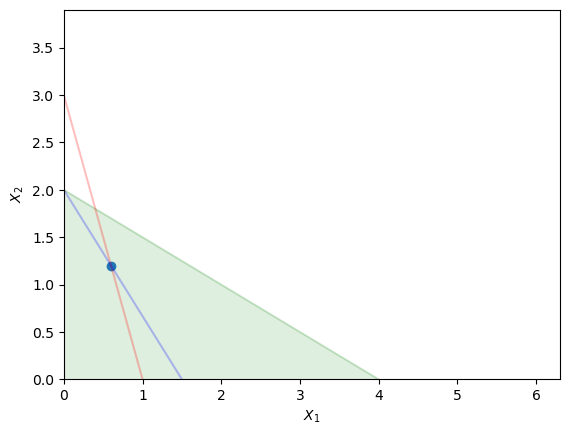

In [217]:
plt.figure()



plt.plot([0,4.0],[2.0,0],color="green", alpha=0.125)
plt.fill_between([0,4.0],[2.0,0],color="green",alpha=0.125)


plt.plot(x,3-3*x,color="red", alpha=0.25)
plt.plot(x,2-(4*x)/3,color="blue", alpha=0.25)



plt.scatter([0.6],[1.2])




plt.xlabel("$X_{1}$")
plt.ylabel("$X_{2}$")


plt.xlim(0)
plt.ylim(0)

plt.show()

#### La gráfica muestra que el punto óptimo es el punto de intersección de $3x_1 + x_2 = 3$ y $4x_1 + 3x_2 \geq 6$. Graficando el punto $x=[0.6,1.2]$ obtenido anterioromente, vemos que claramente, este es punto de intersección.